# Pima_Indians_Diabetes

### Import thư viện

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dữ liệu

In [2]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Ta thấy trong dataset không có dòng dữ liệu bị null hoặc nan

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 0, 'Outcome')

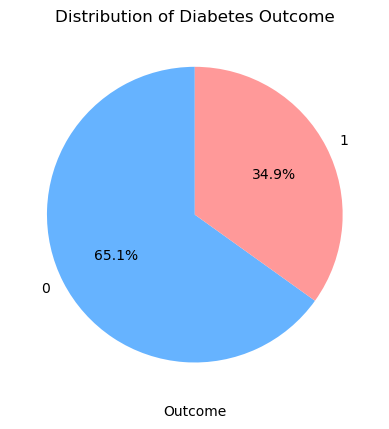

In [5]:
outcome_counts = df['Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999']);
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')

* Trong thí nghiệm này, ta có tập dữ liệu với Outcome có 34.9% là 1 và 65.1% là 0

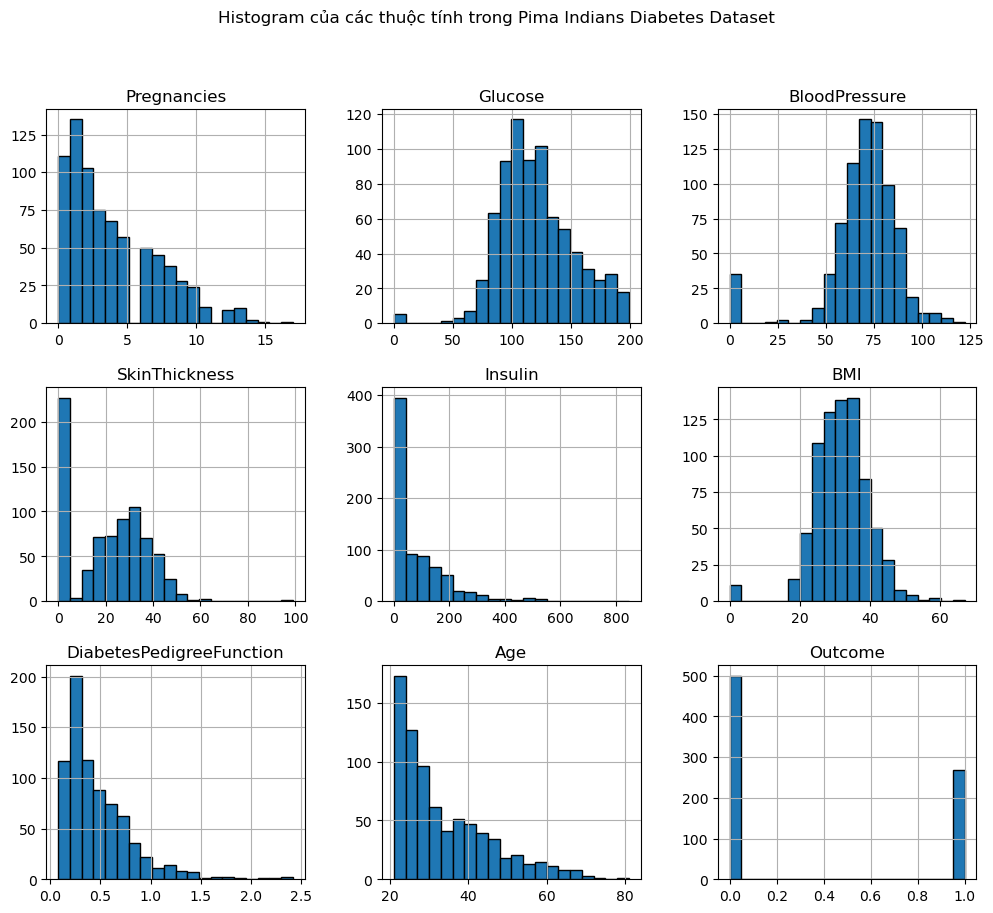

In [6]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram của các thuộc tính trong Pima Indians Diabetes Dataset")
plt.show()

## Nhìn vào histogram ta có thể kết luận rằng:
* Đa số phụ nữ tham gia thí nghiệm có số lần mang thai =< 5 lần, số ít >= 10 lần và có số cực ít (outlier) > 15
* Mức glucose tập trung ở mức từ 100-130, có vài giá trị bất thường mức glucose = 0 (Đây có thể là missing values vì với mức glucose = 0 thì người thường không thể sống)
* Mức BloodPressure tập trung ở mức từ 60-80, có vài giá trị bất thưởng mức BloodPressure = 0 (Đây có thể là missing values)
* Mức SkinThickness tập trung ở mức từ 20-40, có vài giá trị bất thường mức SkinThickness = 0 (Đây có thể là missing values)
* Insulin có nhiều giá trị = 0 (Không thực tế), có vài giá trị mức insulin cực kì lớn
* Mức BMI tập trung ở mức từ 25-35, có nhiều giá trị bằng 0 (Không thực tế)
* Hầu hết =< 1.0 và số ít >= 2
* Số tuổi trung bình của người trong thí nghiệm từ 20-40 tuổi, số ít trên 60 tuổi
* Số người không bệnh nhiều hơn số người bị bệnh, dữ liệu không cân bằng có thể ảnh hưởng đến mô hình

## Filling missing values (zero values)
### Dựa vào histogram ta thấy rằng trong dữ liệu có quá nhiều missing value có thể dẫn đến sai sót trong quá trình phân tích dữ liệu

In [7]:
## Fill missing values của các cột bằng median của từng nhóm Outcome
col_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_with_zeros:
    median0 = df[df['Outcome'] == 0][col].median()
    median1 = df[df['Outcome'] == 1][col].median()
    df.loc[(df[col] == 0) & (df['Outcome'] == 0), col] = median0
    df.loc[(df[col] == 0) & (df['Outcome'] == 1), col] = median1

### Sau khi fill missing value ta tiếp tục phân tích tiếp

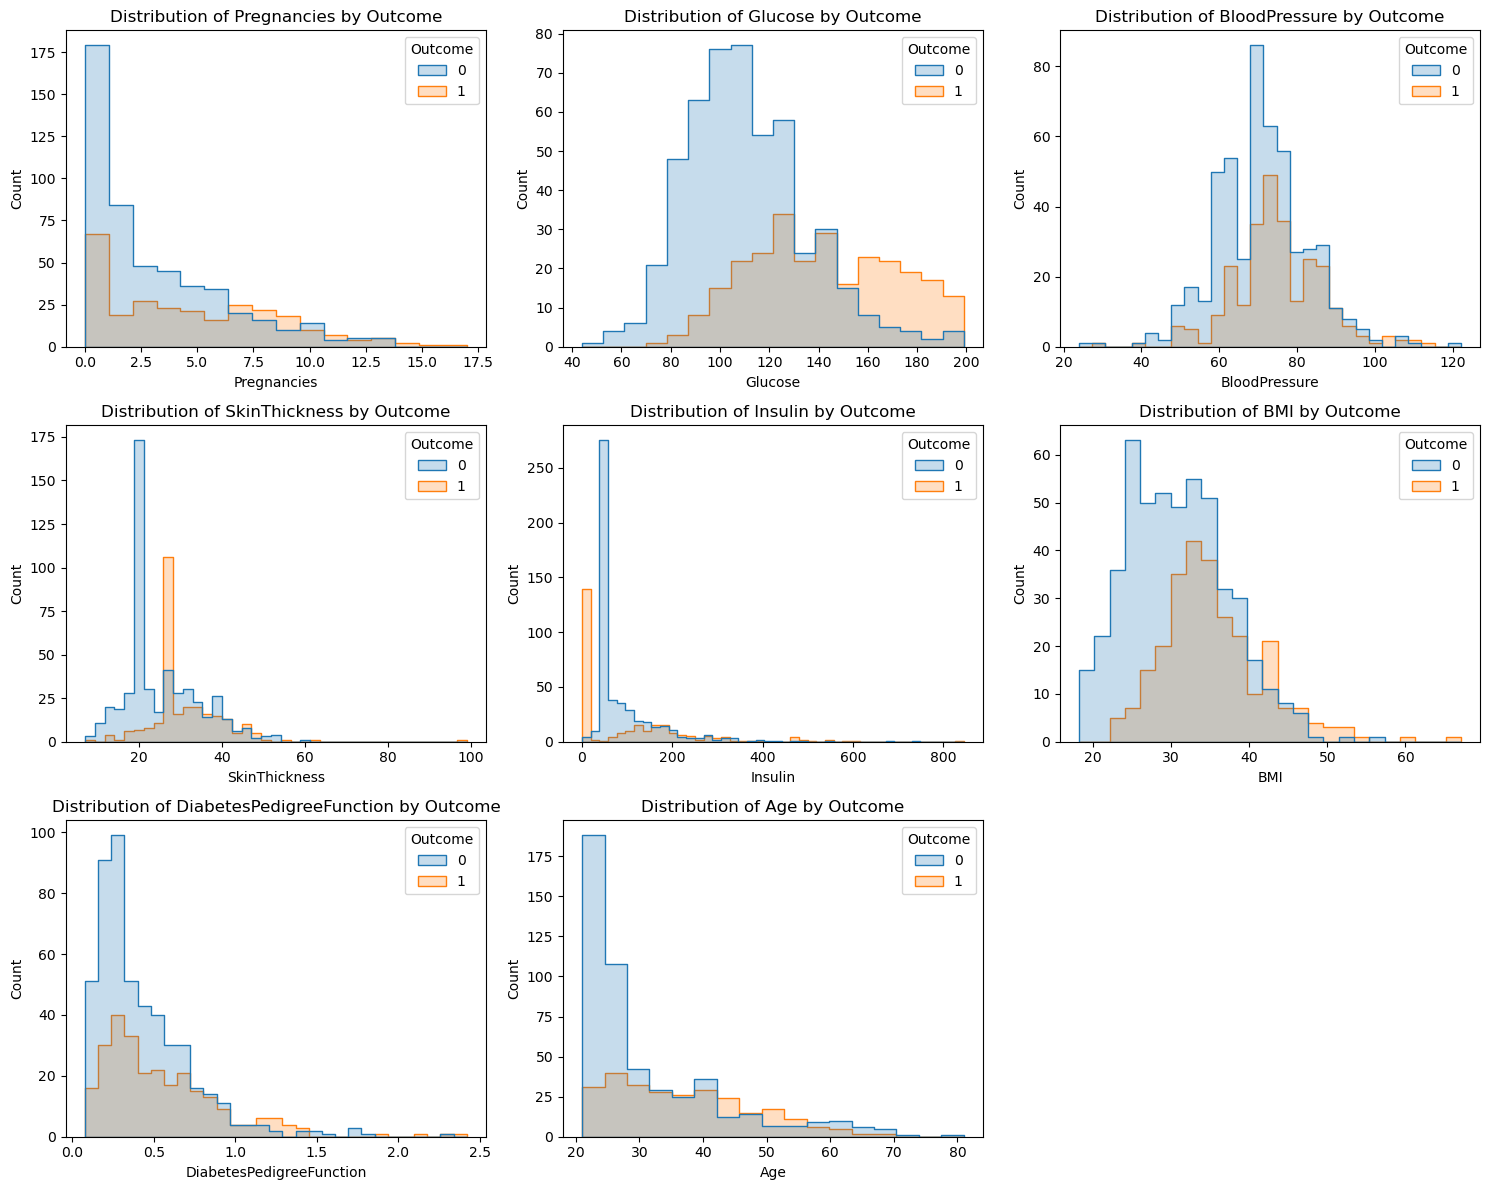

In [8]:
target = 'Outcome'
features = df.columns[df.columns != target].tolist()

def plot_feature_distributions(data, features, target):
    num_features = len(features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols

    plt.figure(figsize=(num_cols * 5, num_rows * 4))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(data=data, x=feature, hue=target, element="step", common_norm=False)
        plt.title(f'Distribution of {feature} by {target}')
        plt.xlabel(feature)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_feature_distributions(df, features, target)

### Nhìn vào biểu đồ ta có thể đưa ra phân tích
* Với số lần mang thai > 5 thì ta thấy tỉ lệ mắc bệnh tiểu đường cao hơn
* Với mức glucose > 150 thì ta thấy tỉ lệ mức bệnh tiểu đường cao hơn
* Với các trường hợp BMI > 40 thì ta thấy có tỉ lệ mắc bệnh cao hơn, đều này cho thấy thể trạng béo phì cũng là nguyên nhân dẫn đến bệnh tiểu đường 
* Với các trường hợp Insulin cao > 150 thì đa số đều mắc phải bệnh tiểu đường, mặc dù đã fill các missing value nhưng vẫn còn các trường hợp có mức insulin = 0 và đa số đều mắc bệnh
* Với DiabetesPredigreeFunction thì ta thấy ở mức > 1 thì đa số đều mắc bệnh, cho thấy bệnh tiểu đường cũng có thể di truyền
* Với các trường hợp có tuổi > 30 thì tỉ lệ mắc bệnh khá cao

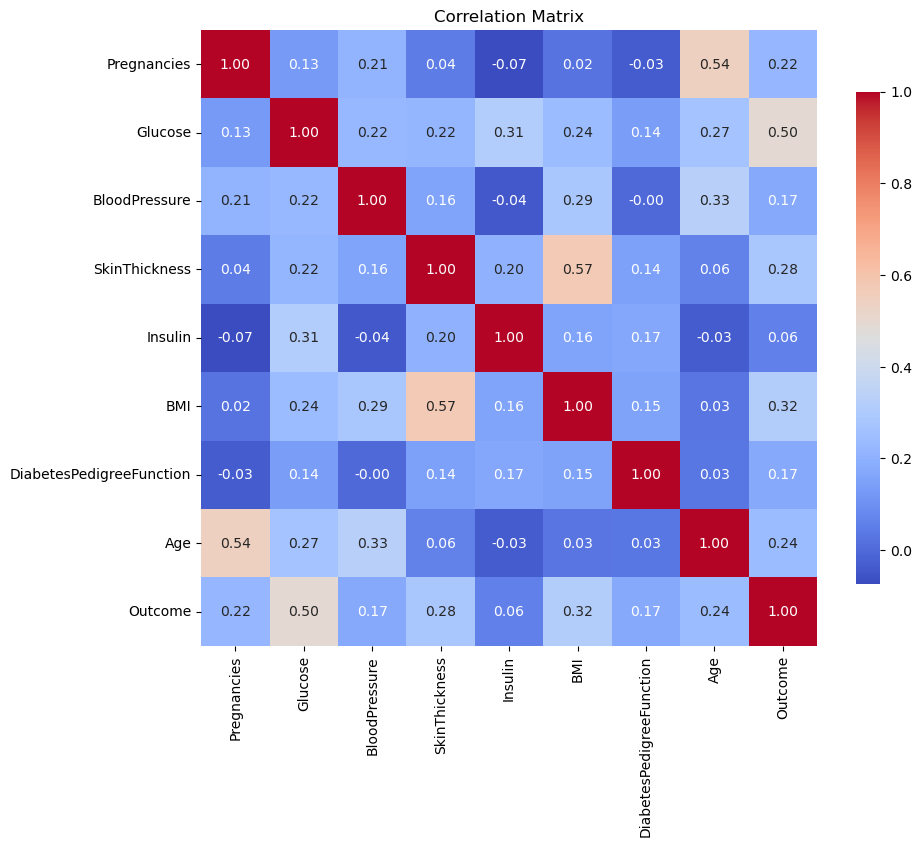

In [9]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

### Nhận xét:
* Dựa vào biểu đồ HeatMap ta thấy được các biến tương quan với Outcome:
    - Glucose tương quan mạnh nhất với Outcome với 0.5 cho thấy người có mức glucose cao có tỉ lệ mắc cao
    - BMI tương quan với Outcome, cho thấy người có BMI cao dễ bị mắc bệnh
    - SkinThickness tương quan với Outcome, cho thấy người có da dày cũng có tỉ lệ mắc bệnh cao hơn
    - Age cũng tương quan trung bình với Outcome, cho thấy người cao tuổi cũng dễ bệnh
    - Pregnancies cũng tương quan trung bình với Outcome, cho số lần mang thai càng nhiều thì tỉ lệ mắc càng lớn
    - DiabetesPedigreeFunction cũng tương quan nhẹ với Outcome, cho di truyền cũng góp phần vào tỉ lệ mắc bệnh nhưng không quá mạnh
    - BloodPressure cũng tương quan nhẹ với Outcome, cho thấy một số người gặp vấn đề về huyết áp cao cũng có thể có tỉ lệ mắc phải bệnh tiểu đường
    - Insulin tương quan yếu với Outcome, nhưng là một yếu tố tương quan mạnh với Glucose, cũng góp phần không nhỏ vào tỉ lệ mắc bệnh
* Các cặp biến tương quan mạnh:
    - Age tương quan mạnh với Pregnancies với 0.54, điều này khá dễ hiểu các người phụ nữ tuổi càng cao thì thường có số lần mang thai nhiều hơn
    - Glucose tương quan với Insulin với 0.31, điều này cho thấy mức Glucose liên quan đến mức Insulin nhưng không quá mạnh
    - SkinThickness tương quan mạnh với BMI với 0.57, khá dễ hiểu vì người có BMI cao thường có lớp da dày hơn
    - BMI tương quan với BloodPressure với 0.29, cho thấy người có chỉ số BMI cao có thể mắc đến chứng tăng huyết áp

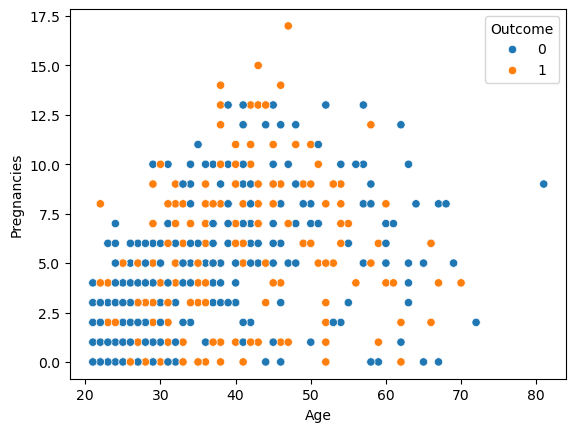

In [10]:
sns.scatterplot(data=df, x='Age', y='Pregnancies', hue='Outcome');

### Nhận xét:
* Khi Age tăng thì Pregnancies có xu hương tăng nhẹ
* Các người trẻ, mang thai ít có tỉ lệ bệnh thấp hơn với người lớn tuổi mang thai nhiều

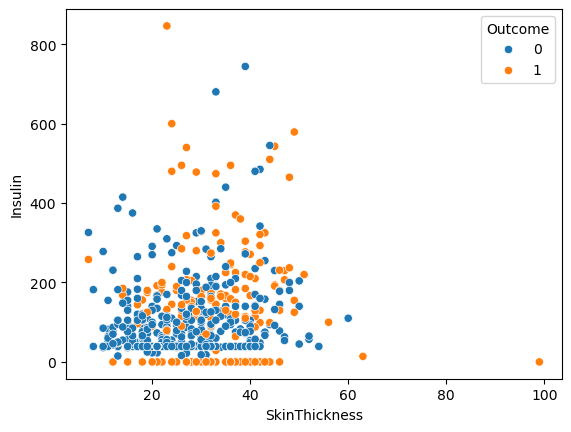

In [11]:
sns.scatterplot(data=df, x='SkinThickness', y='Insulin', hue='Outcome');

## Nhận xét:
* Đối với nhóm người có Insulin < 150 và SkinThickness < 30 có tỉ lệ bệnh thấp 
* Khi SkinThickness tăng thì Insulin cũng có xu hướng tăng cao nhưng không quá nhiều
* Mức Insulin bằng 0 chiếm nhiều trong dữ liệu và đa số mắc bệnh

<Axes: xlabel='SkinThickness', ylabel='BMI'>

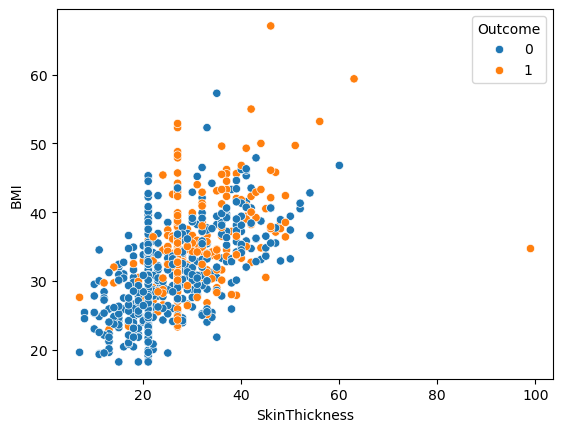

In [12]:
sns.scatterplot(data=df, x='SkinThickness', y='BMI', hue='Outcome')

### Nhận xét:
* Ta thấy BMI càng cao thì SkinThickness càng cao
* Trong khoảng BMI <= 20 thì tỉ lệ người mắc bệnh thấp, BMI càng tăng thì tỉ lệ mắc bệnh càng tăng

<Axes: xlabel='Glucose', ylabel='Insulin'>

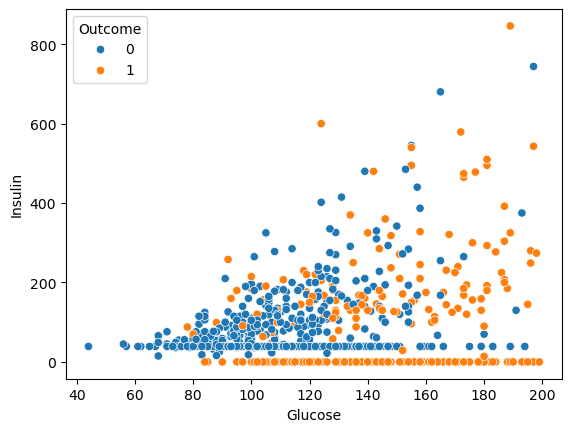

In [13]:
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

### Nhận xét:
* Glucose càng cao thì Insulin càng cao, cao nhất là > 800
* Mức glucose < 125 có tỉ lệ mắc bệnh thấp, mức glucose cao hơn thì tỉ lệ mắc bệnh cao hơn
* Mức Insulin = 0 có tỉ lệ mắc phải rất cao

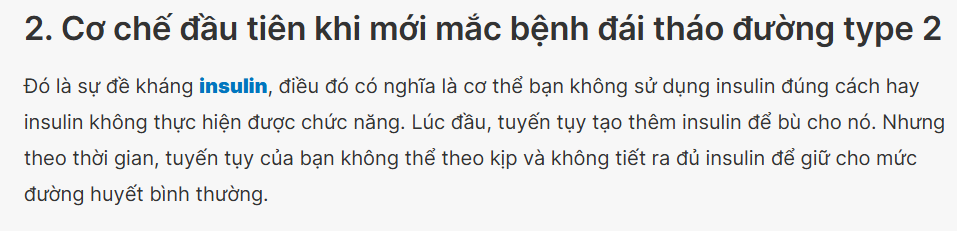

In [14]:
from IPython.display import display, Image

display(Image(filename='./images/image.png'))

### Vấn đề về Insulin
* Sau khi điền các dữ liệu zero thì Feature Insulin vẫn còn các giá trị 0 và đa số đều bị mắc bệnh
* Nhưng không phải vì thế mà có thể kết luận Insulin = 0 là mắc bệnh được vì nó vẫn có thể là các missing values
* Nên nhớ căn bệnh tiểu đường loại 2 chủ yếu liên quan đến tình trạng kháng Insulin, khi cơ thể sử dụng Insulin không hiệu quả. Nên trong thời gian đầu khi bệnh cơ thể vẫn sản xuất ra Insulin, thậm chí nhiều hơn bình thường để bù đắp
* Vậy nên các giá trị 0 không mang ý nghĩa định đoạt được kết quả Outcome
* Các xử lý tốt nhất là ta nên xóa các dòng có Insulin = 0 để tránh ảnh hưởng đến khả năng dự đoán của mô hình

## Tổng kết
* Ta có các feature khá mạnh dùng để dự đoán như: Glucose, BMI, Age, BloodPressure, SkinThickness, Pregnancies
* Các feature còn lại dù không quá tương quan nhưng vẫn là các thành phần quan trọng trong dataset
* Insulin vẫn còn khá nhiều zero value dù đã filling, cách xử lý tốt nhất là xóa các dòng có insulin = 0 để tránh ảnh hưởng đến model

## Preprocessing

### Filling missing values (zero values)

* Thay giá trị 0 bằng median theo nhóm Outcome